In [2]:
import pickle
import gzip
import numpy as np
import os
import time
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
import segmentation_models_pytorch as smp
from matplotlib import pyplot as plt
from torchsummary import summary
import albumentations as A
from albumentations.pytorch import ToTensorV2

### Helper functions

In [3]:
def load_zipped_pickle(filename):
    with gzip.open(filename, 'rb') as f:
        loaded_object = pickle.load(f)
        return loaded_object

In [4]:
def save_zipped_pickle(obj, filename):
    with gzip.open(filename, 'wb') as f:
        pickle.dump(obj, f, 2)
        
def flatten(dicts):
    
    # extract the annotated video frames, their labels
    # and the boxes
    
    images = []
    boxes = []
    labels = []
    
    for i, dic in enumerate(dicts):
        
        video = dic['video']
        frames = dic['frames']
        dic_labels = dic['label']
        
        images.append((video[:,:,frames[0]] / 255).astype('float32'))
        images.append((video[:,:,frames[1]] / 255).astype('float32'))
        images.append((video[:,:,frames[2]] / 255).astype('float32'))
        
        labels.append(dic_labels[:,:,frames[0]].astype('float32'))
        labels.append(dic_labels[:,:,frames[1]].astype('float32'))
        labels.append(dic_labels[:,:,frames[2]].astype('float32'))
        
    return images, labels

### Load data

In [5]:
# load data
train_data = load_zipped_pickle("data/train.pkl")
test_data = load_zipped_pickle("data/test.pkl")

In [6]:
size = (128, 128)

### Preprocessing

In [7]:
# turn dictionaries into lists of images, boxes and labels
images, labels = flatten(train_data)
# resize all images, boxes and labels
#images, boxes, labels = resize(images, boxes, labels, size)

In [8]:
img = images[3]
mask = labels[3] 

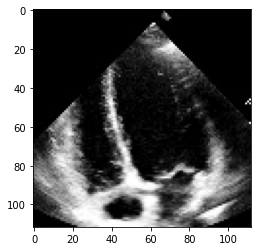

In [9]:
plt.imshow(img, cmap='gray')

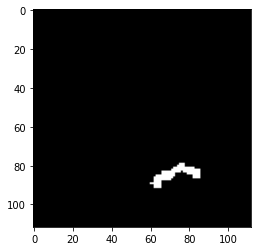

In [10]:
plt.imshow(mask, cmap='gray')

In [20]:
train_transform = A.Compose(
    [
        A.Resize(128, 128),
        #A.augmentations.geometric.transforms.ElasticTransform(alpha=256, sigma=0.08*128, alpha_affine=0.08*128, p=1),
        A.augmentations.geometric.transforms.Affine(scale=(0.7, 1.3), translate_percent=(0,0.1), rotate=(-30,30), shear=(-20, 20), p=1)
    ]
)
transformed = train_transform(image=img, mask=mask)
img_t = transformed["image"]
mask_t = transformed["mask"]

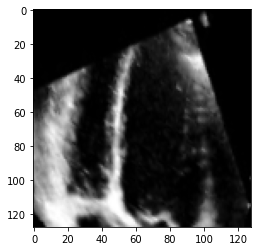

In [21]:
plt.imshow(img_t, cmap='gray')

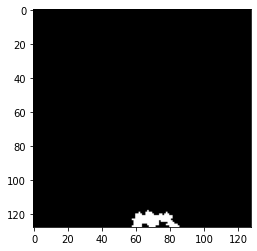

In [22]:
plt.imshow(mask_t, cmap='gray')